https://drive.google.com/file/d/1Ap5D7rkcX0E2nxAACJzCrS96QAjs7bt5/view?usp=share_link

In [1]:
! gdown --id 1Ap5D7rkcX0E2nxAACJzCrS96QAjs7bt5

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ap5D7rkcX0E2nxAACJzCrS96QAjs7bt5
To: /content/car.zip
100% 1.15M/1.15M [00:00<00:00, 103MB/s]


In [2]:
! unzip /content/car.zip -d /content/Car_sels

Archive:  /content/car.zip
  inflating: /content/Car_sels/audi.csv  
  inflating: /content/Car_sels/bmw.csv  
  inflating: /content/Car_sels/cclass.csv  
  inflating: /content/Car_sels/focus.csv  
  inflating: /content/Car_sels/ford.csv  
  inflating: /content/Car_sels/hyundi.csv  
  inflating: /content/Car_sels/merc.csv  
  inflating: /content/Car_sels/skoda.csv  
  inflating: /content/Car_sels/toyota.csv  
  inflating: /content/Car_sels/unclean cclass.csv  
  inflating: /content/Car_sels/unclean focus.csv  
  inflating: /content/Car_sels/vauxhall.csv  
  inflating: /content/Car_sels/vw.csv  


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

In [4]:
df_audi = pd.read_csv('/content/Car_sels/audi.csv')

In [5]:
df_audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [6]:
df = df_audi

In [7]:
train, test = train_test_split(df)

<Axes: >

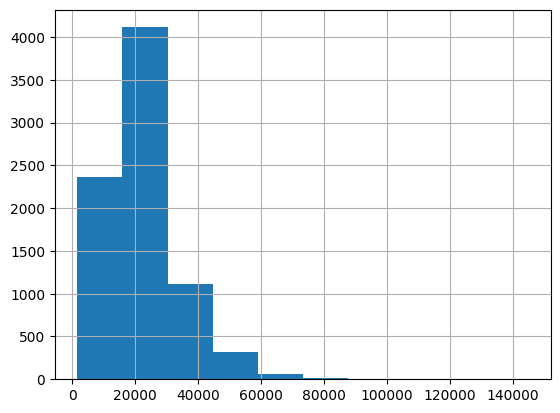

In [8]:
train['price'].hist()

In [9]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1997,1,4650.000000,4650.0
2002,2,2433.000000,2433.0
2003,5,3792.000000,2495.0
2004,2,2297.000000,2297.0
2005,5,3669.000000,2990.0
2006,6,7143.166667,4745.0
2007,11,8586.909091,5495.0
2008,13,4840.384615,4495.0
2009,17,6238.529412,5995.0


<Axes: xlabel='year'>

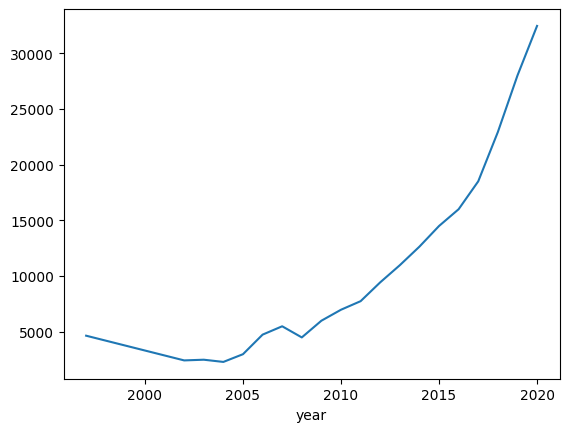

In [10]:
train.groupby('year')['price'].median().plot()

In [11]:
train['price_pred_median'] = train['price'].median()

In [12]:
train['error'] = abs(train['price_pred_median'] - train['price'])

In [13]:
train['error_pct'] = train['error'] / train['price']

In [14]:
test['price_pred_median'] = test['price'].median()
test['error'] = abs(test['price_pred_median'] - test['price'])
test['error_pct'] = test['error'] / test['price']

In [15]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct
5712,Q3,2017,20995,Semi-Auto,35852,Petrol,150,47.9,1.4,20300.0,695.0,0.033103
5662,A4,2020,42500,Semi-Auto,826,Diesel,145,40.4,3.0,20300.0,22200.0,0.522353
6150,Q5,2019,30970,Semi-Auto,14668,Diesel,145,38.2,2.0,20300.0,10670.0,0.344527
9403,S3,2014,17990,Automatic,38473,Petrol,205,40.9,2.0,20300.0,2310.0,0.128405
5027,A3,2017,17450,Manual,27875,Petrol,145,60.1,1.4,20300.0,2850.0,0.163324
...,...,...,...,...,...,...,...,...,...,...,...,...
5692,A3,2019,22990,Semi-Auto,9967,Petrol,145,42.2,1.5,20300.0,2690.0,0.117007
2184,A1,2017,14995,Manual,15000,Petrol,30,56.5,1.4,20300.0,5305.0,0.353785
6544,TT,2017,25750,Manual,33249,Petrol,235,38.7,2.0,20300.0,5450.0,0.211650
9444,Q3,2018,21490,Manual,6359,Petrol,145,51.4,1.4,20300.0,1190.0,0.055375


In [16]:
model_year_median = train.groupby('year')['price'].median().reset_index()

In [17]:
model_year_median.columns = ['year', 'price_pred_year_median']

In [18]:
train = train.merge(model_year_median, how='left', on = 'year')

In [19]:
mean_absolute_error(train['price'], train['price_pred_year_median'])

5372.423072115986

In [20]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_median'])

0.21992636387146358

In [21]:
test = test.merge(model_year_median, how='left', on = 'year')

In [22]:
test.isna().mean()

model                     0.000000
year                      0.000000
price                     0.000000
transmission              0.000000
mileage                   0.000000
fuelType                  0.000000
tax                       0.000000
mpg                       0.000000
engineSize                0.000000
price_pred_median         0.000000
error                     0.000000
error_pct                 0.000000
price_pred_year_median    0.000375
dtype: float64

In [24]:
test = test[test['price_pred_year_median'].notna()]

In [25]:
mean_absolute_error(test['price'], test['price_pred_year_median'])

5608.7138034508625

In [26]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_median'])

0.22592405475740693

In [27]:
train.groupby('engineSize')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engineSize,,,
0.0,43,32459.441860,32444.0
1.0,422,16058.857820,15070.5
1.2,24,10290.166667,9892.5
1.4,1175,15844.234894,15798.0
1.5,568,24395.047535,23995.0
1.6,709,15811.153738,15590.0
1.8,99,14904.909091,15763.0
1.9,3,2911.666667,2795.0
2.0,3889,22496.238879,21500.0


In [28]:
def engine_group(x) :
  if x <= 1.4 :
    return '<= 1.4'
  if x <= 1.9 :
    return '<= 1.9'
  if x <= 2.9 :
    return '<= 2.9'
  return '>3'

In [29]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [30]:
t = train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])

In [31]:
t

,count,mean,median
engine_group,,,
<= 1.4,1664,16247.917067,15800.0
<= 1.9,1379,19253.673677,20594.0
<= 2.9,3972,22941.883686,21950.0
>3,986,38573.783976,37960.0


In [32]:
model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()

In [33]:
model_year_engine_median

,year,engine_group,price
0,1997,>3,4650.0
1,2002,<= 1.9,2433.0
2,2003,<= 1.4,2490.0
3,2003,<= 1.9,4990.0
4,2003,<= 2.9,2495.0
...,...,...,...
61,2019,>3,46490.0
62,2020,<= 1.4,23000.0
63,2020,<= 1.9,26154.0
64,2020,<= 2.9,33444.0


In [34]:
t = train.pivot_table(index = 'year', columns='engine_group', values= 'price', aggfunc='median')

<Axes: xlabel='engine_group', ylabel='year'>

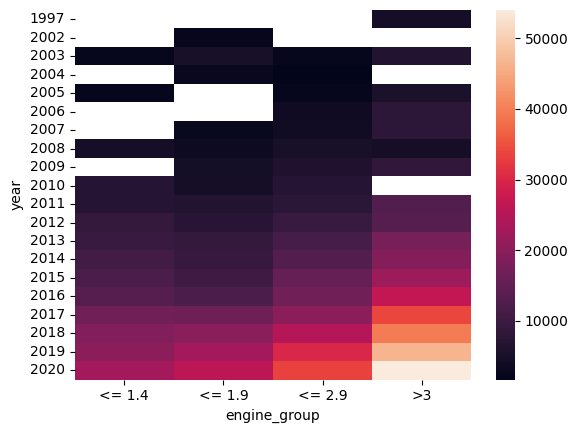

In [35]:
sns.heatmap(t)

In [36]:
model_year_engine_median = model_year_engine_median.rename({'price' : 'price_pred_year_engine'}, axis=1)

In [37]:
train = train.merge(model_year_engine_median, how='left', on = ['year', 'engine_group'])

In [38]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine
0,Q3,2019,26990,Manual,1213,Diesel,145,42.8,2.0,20100.0,6890.0,0.255280,27990.0,<= 2.9,29950.0
1,A1,2018,16890,Manual,8768,Petrol,150,51.4,1.0,20100.0,3210.0,0.190053,22920.5,<= 1.4,18995.0
2,A5,2017,20150,Semi-Auto,45465,Diesel,145,62.8,2.0,20100.0,50.0,0.002481,18500.0,<= 2.9,19990.0
3,A6,2019,53939,Semi-Auto,6238,Diesel,145,37.7,3.0,20100.0,33839.0,0.627357,27990.0,>3,46490.0
4,Q5,2018,31900,Semi-Auto,11000,Petrol,150,40.4,2.0,20100.0,11800.0,0.369906,22920.5,<= 2.9,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2016,17499,Automatic,36615,Diesel,145,51.4,2.0,20100.0,2601.0,0.148637,15998.0,<= 2.9,16900.0
7997,A3,2009,4240,Manual,124000,Diesel,145,53.3,2.0,20100.0,15860.0,3.740566,5995.0,<= 2.9,5995.0
7998,A6,2019,43695,Automatic,1500,Diesel,145,36.2,3.0,20100.0,23595.0,0.539993,27990.0,>3,46490.0
7999,Q2,2017,18650,Manual,24000,Diesel,30,61.4,1.6,20100.0,1450.0,0.077748,18500.0,<= 1.9,16240.0


In [39]:
mean_absolute_error(train['price'], train['price_pred_year_engine'])

3530.4754405699287

In [40]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine'])

0.15188865214506897

In [41]:
test['engine_group'] = test['engineSize'].apply(engine_group)

In [42]:
test = test.merge(model_year_engine_median, how='left', on = ['year', 'engine_group'])

In [43]:
test.isna().mean()

model                     0.000000
year                      0.000000
price                     0.000000
transmission              0.000000
mileage                   0.000000
fuelType                  0.000000
tax                       0.000000
mpg                       0.000000
engineSize                0.000000
price_pred_median         0.000000
error                     0.000000
error_pct                 0.000000
price_pred_year_median    0.000000
engine_group              0.000000
price_pred_year_engine    0.002251
dtype: float64

In [44]:
def error(y_true, y_pred) :
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [45]:
test_no_na = test.dropna().copy()

In [46]:
error(train['price'], train['price_pred_year_engine'])

3530.4754405699287
0.15188865214506897


In [47]:
error(test_no_na['price'], test_no_na['price_pred_year_engine'])

3576.952819548872
0.15406251292008627


In [48]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine
0,Q3,2019,26990,Manual,1213,Diesel,145,42.8,2.0,20100.0,6890.0,0.255280,27990.0,<= 2.9,29950.0
1,A1,2018,16890,Manual,8768,Petrol,150,51.4,1.0,20100.0,3210.0,0.190053,22920.5,<= 1.4,18995.0
2,A5,2017,20150,Semi-Auto,45465,Diesel,145,62.8,2.0,20100.0,50.0,0.002481,18500.0,<= 2.9,19990.0
3,A6,2019,53939,Semi-Auto,6238,Diesel,145,37.7,3.0,20100.0,33839.0,0.627357,27990.0,>3,46490.0
4,Q5,2018,31900,Semi-Auto,11000,Petrol,150,40.4,2.0,20100.0,11800.0,0.369906,22920.5,<= 2.9,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2016,17499,Automatic,36615,Diesel,145,51.4,2.0,20100.0,2601.0,0.148637,15998.0,<= 2.9,16900.0
7997,A3,2009,4240,Manual,124000,Diesel,145,53.3,2.0,20100.0,15860.0,3.740566,5995.0,<= 2.9,5995.0
7998,A6,2019,43695,Automatic,1500,Diesel,145,36.2,3.0,20100.0,23595.0,0.539993,27990.0,>3,46490.0
7999,Q2,2017,18650,Manual,24000,Diesel,30,61.4,1.6,20100.0,1450.0,0.077748,18500.0,<= 1.9,16240.0


In [49]:
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2037,28367.664212,26796.0
Manual,3294,16085.639951,15698.0
Semi-Auto,2670,26957.016105,23995.0


In [50]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1997,1,4650.000000,4650.0
2002,2,2433.000000,2433.0
2003,5,3792.000000,2495.0
2004,2,2297.000000,2297.0
2005,5,3669.000000,2990.0
2006,6,7143.166667,4745.0
2007,11,8586.909091,5495.0
2008,13,4840.384615,4495.0
2009,17,6238.529412,5995.0


In [51]:
train['year_group'] = pd.cut(train['year'], [0,2011,2016,float('inf')])

In [52]:
train.groupby('year_group')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year_group,,,
"(0.0, 2011.0]",126,6861.738095,6372.5
"(2011.0, 2016.0]",2854,15439.790820,14747.0
"(2016.0, inf]",5021,27448.022505,24990.0


In [53]:
model_year_group_engine_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()

In [54]:
model_year_group_engine_median.rename({'price':'price_pred_year-engine_group'}, axis=1)

,year_group,engine_group,price_pred_year-engine_group
0,"(0.0, 2011.0]",<= 1.4,6475.0
1,"(0.0, 2011.0]",<= 1.9,4395.0
2,"(0.0, 2011.0]",<= 2.9,6482.5
3,"(0.0, 2011.0]",>3,7995.0
4,"(2011.0, 2016.0]",<= 1.4,12691.0
5,"(2011.0, 2016.0]",<= 1.9,10909.5
6,"(2011.0, 2016.0]",<= 2.9,15500.0
7,"(2011.0, 2016.0]",>3,22725.0
8,"(2016.0, inf]",<= 1.4,18490.0
9,"(2016.0, inf]",<= 1.9,22450.0


In [55]:
train = train.merge(model_year_engine_median, how='left', on = ['year', 'engine_group'])

In [56]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,error,error_pct,price_pred_year_median,engine_group,price_pred_year_engine_x,year_group,price_pred_year_engine_y
0,Q3,2019,26990,Manual,1213,Diesel,145,42.8,2.0,20100.0,6890.0,0.255280,27990.0,<= 2.9,29950.0,"(2016.0, inf]",29950.0
1,A1,2018,16890,Manual,8768,Petrol,150,51.4,1.0,20100.0,3210.0,0.190053,22920.5,<= 1.4,18995.0,"(2016.0, inf]",18995.0
2,A5,2017,20150,Semi-Auto,45465,Diesel,145,62.8,2.0,20100.0,50.0,0.002481,18500.0,<= 2.9,19990.0,"(2016.0, inf]",19990.0
3,A6,2019,53939,Semi-Auto,6238,Diesel,145,37.7,3.0,20100.0,33839.0,0.627357,27990.0,>3,46490.0,"(2016.0, inf]",46490.0
4,Q5,2018,31900,Semi-Auto,11000,Petrol,150,40.4,2.0,20100.0,11800.0,0.369906,22920.5,<= 2.9,25000.0,"(2016.0, inf]",25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,Q3,2016,17499,Automatic,36615,Diesel,145,51.4,2.0,20100.0,2601.0,0.148637,15998.0,<= 2.9,16900.0,"(2011.0, 2016.0]",16900.0
7997,A3,2009,4240,Manual,124000,Diesel,145,53.3,2.0,20100.0,15860.0,3.740566,5995.0,<= 2.9,5995.0,"(0.0, 2011.0]",5995.0
7998,A6,2019,43695,Automatic,1500,Diesel,145,36.2,3.0,20100.0,23595.0,0.539993,27990.0,>3,46490.0,"(2016.0, inf]",46490.0
7999,Q2,2017,18650,Manual,24000,Diesel,30,61.4,1.6,20100.0,1450.0,0.077748,18500.0,<= 1.9,16240.0,"(2016.0, inf]",16240.0
